In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import sqlite3
import pymysql
plt.style.use('ggplot')

In [2]:
# Load Dataframe from Database
def retrieve_data_from_mysql(host, user, password, database, table_name):
    try:
        conn = pymysql.connect(host=host, user=user, password=password, database=database)
        query = f"SELECT * FROM {table_name}"
        df = pd.read_sql(query, conn)
        conn.close()
        return df
    except pymysql.Error as e:
        print(f"Error: {e}")
        return None

def main():
    host = 'localhost'
    user = 'root'
    password = 'root'
    database = 'AirlineDB'
    table_name = 'AirlinesDelayVisual'

    df = retrieve_data_from_mysql(host, user, password, database, table_name)
    if df is not None:
        return df
    else:
        print("Failed to retrieve data from MySQL.")

df = main()

/home/azizi/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
# Convert numbers to float type. 
df['EA_Time_Minutes'] = df['EA_Time_Minutes'].replace('', np.nan).astype(float)
df['RA_Time_Minutes'] = df['RA_Time_Minutes'].replace('', np.nan).astype(float)
df['Delay_Time'] = df['Delay_Time'].replace('', np.nan).astype(float)

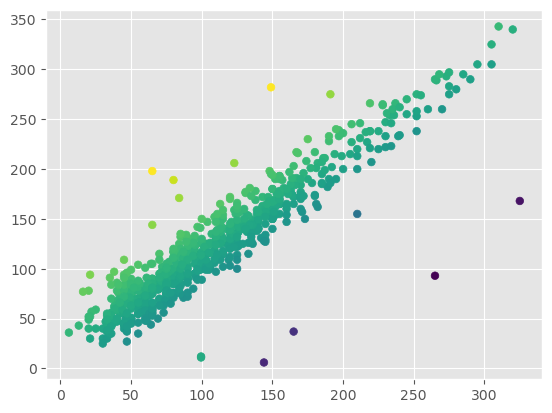

In [4]:
plt.scatter(df.EA_Time_Minutes, df.RA_Time_Minutes, c = df.Delay_Time, s=30,  cmap = 'viridis' );

/home/azizi/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


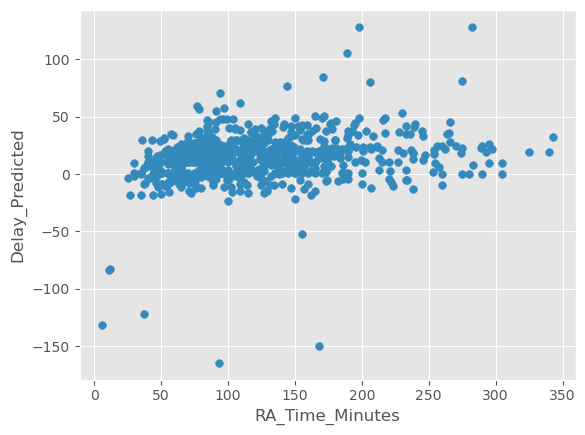

In [5]:
#df.plot.scatter(x='RA_Time_Minutes', y='Delay_Time',c='Delay_Predicted' ,s=30, cmap = 'viridis');
df.plot.scatter(x='RA_Time_Minutes',y='Delay_Predicted' ,s=30, cmap = 'viridis');


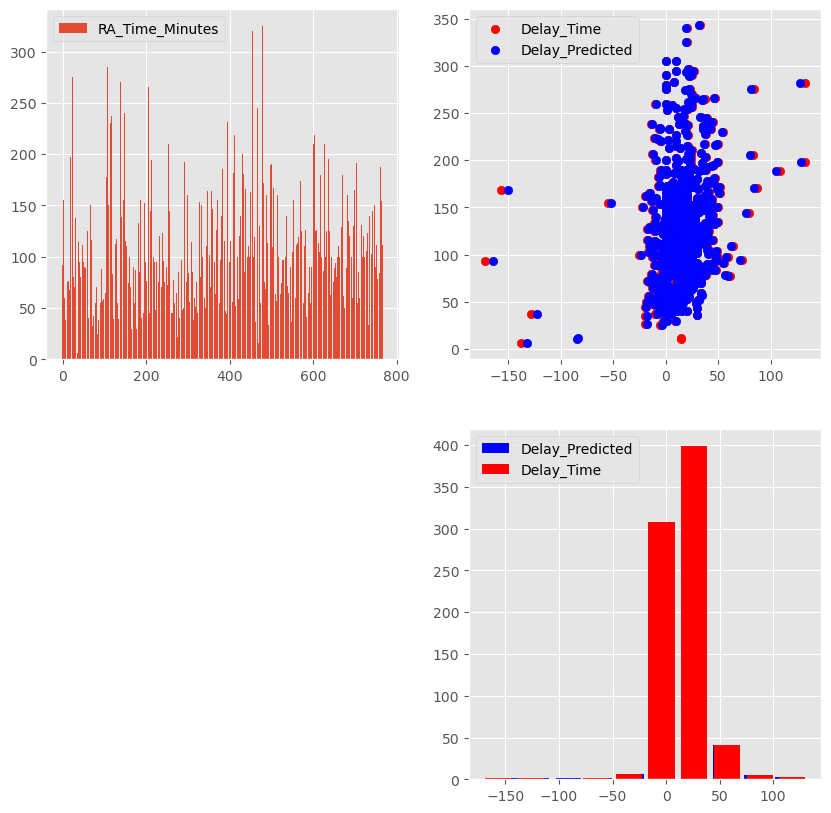

In [6]:
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.bar(range(len(df)), df.EA_Time_Minutes, label = 'RA_Time_Minutes')
plt.legend()

plt.subplot(222)
plt.scatter(df.Delay_Time , df.RA_Time_Minutes, c = 'red', label = "Delay_Time")
plt.legend()

plt.subplot(222)
plt.scatter(df.Delay_Predicted , df.RA_Time_Minutes, c = 'blue', label = "Delay_Predicted")
plt.legend()

plt.subplot(224)
plt.hist(df.Delay_Predicted, color='blue', rwidth = 0.8, label = "Delay_Predicted");
plt.legend();

plt.subplot(224)
plt.hist(df.Delay_Time, color='red', rwidth = 0.8, label = "Delay_Time");
plt.legend();

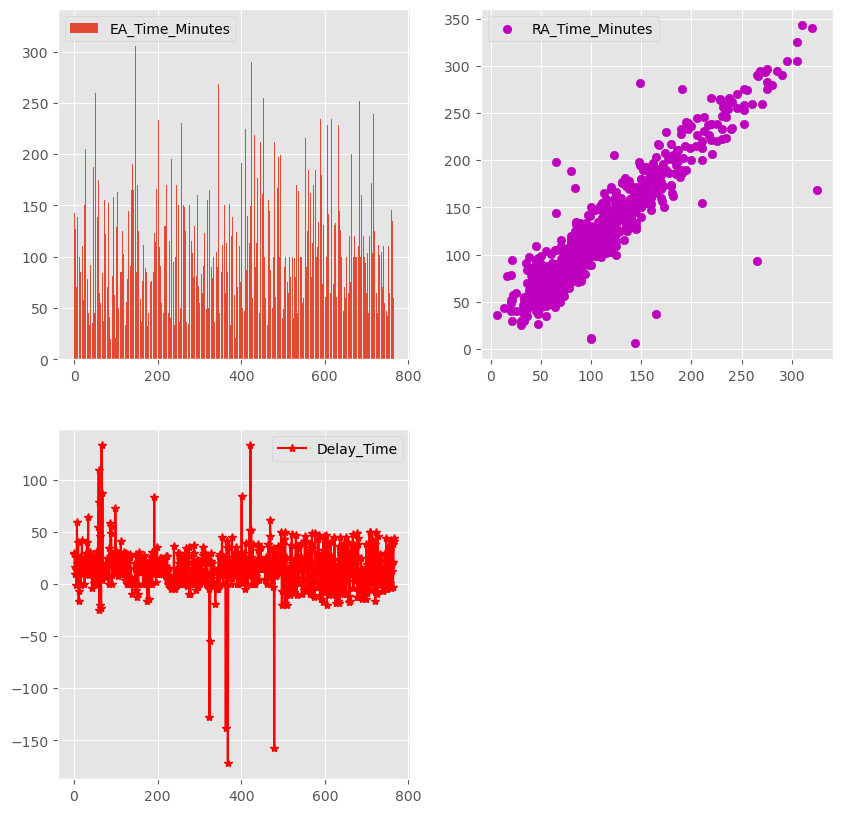

In [7]:
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.bar(range(len(df)), df.EA_Time_Minutes, label = 'EA_Time_Minutes')
plt.legend()

plt.subplot(222)
plt.scatter(df.EA_Time_Minutes , df.RA_Time_Minutes, c = 'm', label = "RA_Time_Minutes")
plt.legend()

plt.subplot(223)
plt.plot(df.Delay_Time,'r-*', label = "Delay_Time")
plt.legend()

#plt.subplot(224)
#plt.hist(df.RealArrivalTime, color='green', rwidth = 0.8, label = "RealArrivalTime");
#plt.legend();

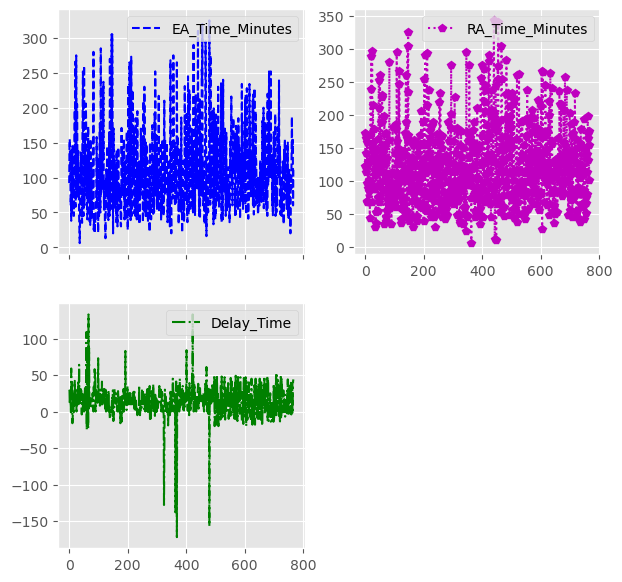

In [8]:
df.plot(y = ['EA_Time_Minutes', 'RA_Time_Minutes','Delay_Time'], subplots=True, layout= (2,2),
        style = ['b--', 'm:p', 'g-.', 'c-d'], figsize=(7,7));

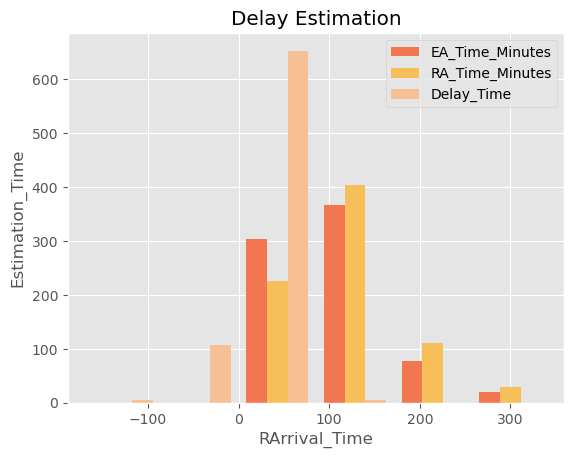

In [9]:
plt.hist([df.EA_Time_Minutes, df.RA_Time_Minutes , df.Delay_Time], bins = 6, color = ['#f27750', '#f7bf59', '#f7bf94'],
         label = ['EA_Time_Minutes', 'RA_Time_Minutes' , 'Delay_Time'])
plt.ylabel('Estimation_Time')
plt.xlabel('RArrival_Time')
plt.title('Delay Estimation')
plt.legend();

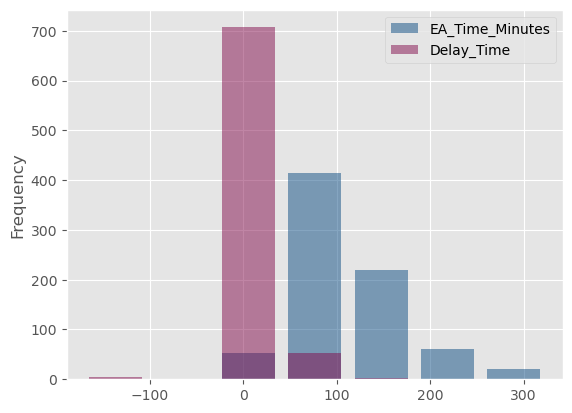

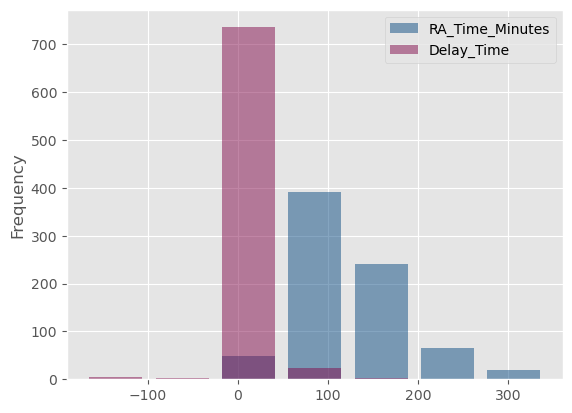

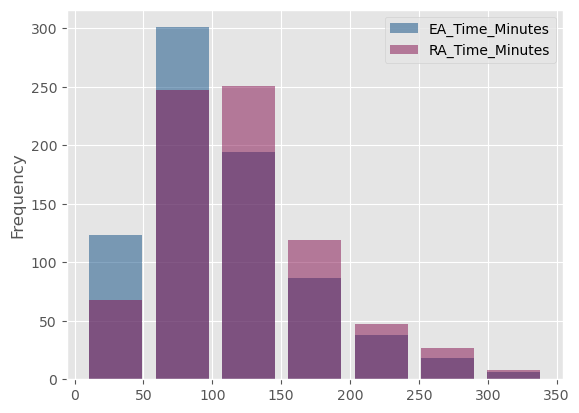

In [10]:
df.plot.hist(y=['EA_Time_Minutes', 'Delay_Time'], bins = 7, rwidth = 0.8 , color= ['#0c4c83', '#830c4c'], alpha=0.5);

df.plot.hist(y=['RA_Time_Minutes', 'Delay_Time'], bins = 7, rwidth = 0.8 , color= ['#0c4c83', '#830c4c'], alpha=0.5);

df.plot.hist(y=['EA_Time_Minutes', 'RA_Time_Minutes'], bins = 7, rwidth = 0.8 , color= ['#0c4c83', '#830c4c'], alpha=0.5);
